# Using python for exploratory data analysis 

In [5]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import matplotlib.dates as mdates



crime_data = pd.read_csv('database.csv')  # importing the database

A look up into the dataset, there are 11 columns containing the information of the place where the crime look place and basic info about the victim. There seems to be enough information to find some relation between the crime rate in each geographical division within the country as well as the gender/age group that it's the most affected. 



In [7]:
crime_data

,DEPARTAMENTO,MUNICIPIO,CODIGO DANE,ARMAS MEDIOS,FECHA HECHO,GENERO,GRUPO ETARIO,CANTIDAD,DELITO,ARTICULO - DELITO,MUNICIPIO-CODIGO DANE
0,ANTIOQUIA,SONSON,5756000.0,SIN EMPLEO DE ARMAS,2016-05-19 00:00:00,FEMENINO,MENORES,1,ARTÍCULO 209. ACTOS SEXUALES CON MENOR DE 14 AÑOS,ARTÍCULO 209,SONSON- ID[5756000]
1,META,PUERTO GAITÁN,50568000.0,SIN EMPLEO DE ARMAS,2016-05-19 00:00:00,FEMENINO,MENORES,1,ARTÍCULO 209. ACTOS SEXUALES CON MENOR DE 14 AÑOS,ARTÍCULO 209,PUERTO GAITÁN- ID[50568000]
2,VALLE,BUENAVENTURA,76109000.0,SIN EMPLEO DE ARMAS,2016-05-19 00:00:00,FEMENINO,MENORES,1,ARTÍCULO 208. ACCESO CARNAL ABUSIVO CON MENOR ...,ARTÍCULO 208,BUENAVENTURA- ID[76109000]
3,CESAR,BOSCONIA,20060000.0,SIN EMPLEO DE ARMAS,2016-05-19 00:00:00,FEMENINO,MENORES,1,ARTÍCULO 205. ACCESO CARNAL VIOLENTO,ARTÍCULO 205,BOSCONIA- ID[20060000]
4,CAUCA,POPAYÁN (CT),19001000.0,SIN EMPLEO DE ARMAS,2016-05-19 00:00:00,MASCULINO,ADULTOS,1,ARTÍCULO 210 A. ACOSO SEXUAL,ARTÍCULO 210 A,POPAYÁN (CT)- ID[19001000]
...,...,...,...,...,...,...,...,...,...,...,...
236467,ANTIOQUIA,MUTATÁ,5480000.0,SIN EMPLEO DE ARMAS,2016-05-19 00:00:00,FEMENINO,MENORES,1,ARTÍCULO 208. ACCESO CARNAL ABUSIVO CON MENOR ...,ARTÍCULO 208,MUTATÁ- ID[5480000]
236468,SUCRE,SINCELEJO (CT),70001000.0,SIN EMPLEO DE ARMAS,2016-05-19 00:00:00,FEMENINO,ADULTOS,1,ARTÍCULO 205. ACCESO CARNAL VIOLENTO,ARTÍCULO 205,SINCELEJO (CT)- ID[70001000]
236469,VALLE,CANDELARIA,76130000.0,SIN EMPLEO DE ARMAS,2016-05-19 00:00:00,FEMENINO,ADOLESCENTES,1,ARTÍCULO 208. ACCESO CARNAL ABUSIVO CON MENOR ...,ARTÍCULO 208,CANDELARIA- ID[76130000]
236470,SANTANDER,GIRÓN,68307000.0,SIN EMPLEO DE ARMAS,2016-05-19 00:00:00,FEMENINO,MENORES,1,ARTÍCULO 209. ACTOS SEXUALES CON MENOR DE 14 AÑOS,ARTÍCULO 209,GIRÓN- ID[68307000]


##  DATA PREPARATION

In [9]:
crime_data.rename(columns={"FECHA HECHO": "FECHA",
                  "ARMAS MEDIOS": "ARMA"}, inplace=True)  # simplifying names
crime_data.isnull().sum()  # There are 2 missing values
# The number is low so both rows with missing values will be dropped
crime_data.dropna(inplace=True)

# All Colombia's departments names are in the dataset without any misspelled duplicate.
set(crime_data["DEPARTAMENTO"])

# Changing columns to category type

columns = ["DEPARTAMENTO", "MUNICIPIO", "GENERO", "GRUPO ETARIO",
           "DELITO", "ARMA", "CANTIDAD", "ARTICULO - DELITO", "MUNICIPIO-CODIGO DANE"]
for i in columns:
    crime_data[i] = crime_data[i].astype("category")

#CODIGO.DANE should be a factor as it is an ID assigned for each city/municipality.
#before hand it will be converted to INT so remove its decimals
crime_data["CODIGO DANE"] = crime_data["CODIGO DANE"].astype(
    int).astype("category")

#FECHA is changed from factor to date class
crime_data["FECHA"] = pd.to_datetime(crime_data["FECHA"])

#GENERO with translated categories

dict={'NO REPORTA':'NOT REPORTED','MASCULINO':'MALE','FEMENINO':'FEMALE'}
crime_data['GENERO'].replace(dict,inplace=True)
# ARMA with translated categories

dict={'SIN EMPLEO DE ARMAS':'NO USE OF WEAPONS','NO REPORTADO':'NOT REPORTED',
     'CONTUNDENTES':'BLUNT','ARMA BLANCA / CORTOPUNZANTE':'SHARP WEAPON',
     'ESCOPOLAMINA':'SCOPOLAMINE','ARMA DE FUEGO':'FIREARM',
     'LICOR ADULTERADO':'ADULTERATED LIQUOR','CINTAS/CINTURON':'BELTS',
     'ESPOSAS':'HANDCUFFS'}
crime_data['ARMA'].replace(dict,inplace=True)

#GRUPO ETARIO with trasnlated categories
dict={'ADOLESCENTES':'ADOLESCENTS','ADULTOS':'ADULTS','MENORES':'MINORS','NO REPORTA':'NOT REPORTED'}
crime_data['GRUPO ETARIO'].replace(dict,inplace=True)

#CANTIDAD
crime_data["CANTIDAD"].value_counts()
#The outlier of 86 has to be removed as it's likely a mistype.
crime_data=crime_data[crime_data["CANTIDAD"]!=86]

## EDA - EXPLORATORY DATA ANALYSIS

The next graph shows the total amount of reports made in each department and labeled by color for each gender. It shows that females are the most common victims in sexual crimes and the top departments on the list are the largest in population in the country. 

### DEPARTAMENTO

Text(0.5, 1.0, 'Crime reports distribution by department and gender')

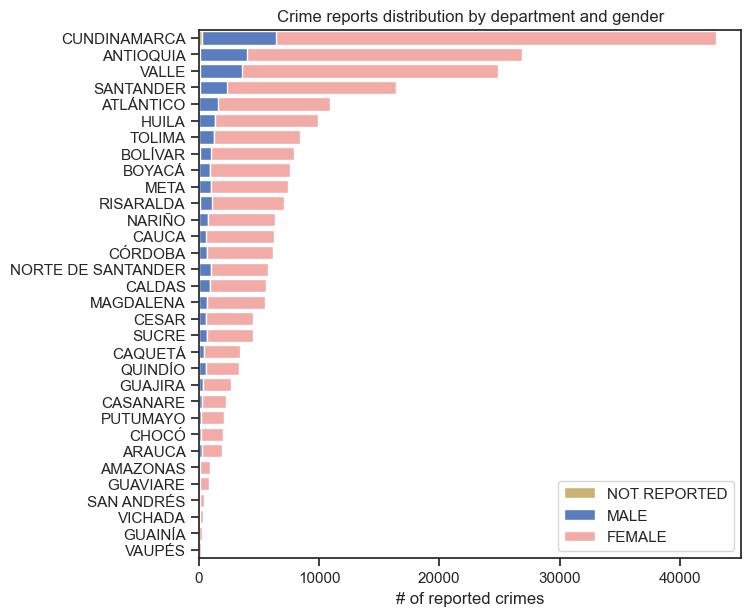

In [12]:
#DEPARTAMENTO

crime_by_department=crime_data.groupby(['DEPARTAMENTO','GENERO'])['GENERO'].count().unstack()
crime_by_department=crime_by_department.fillna(0)

#Now create a new column with the total of reports by each department
crime_by_department['TOTAL']=crime_by_department['FEMALE']+crime_by_department['MALE']+crime_by_department['NOT REPORTED']
crime_by_department=crime_by_department.sort_values('TOTAL',ascending=False) # Sort TOTAL in decreasing order

# Horizontal bar graph showing the distribution of crimes by department and gender
sns.set_theme(style="ticks")
fig,ax = plt.subplots(figsize=(7,7),dpi=100)
sns.set_color_codes("muted")
sns.barplot(x="NOT REPORTED",y=crime_by_department.index.values,
            data=crime_by_department,color='y',label='NOT REPORTED',
            order=crime_by_department.index.values)
sns.barplot(x="MALE",y=crime_by_department.index.values,
            data=crime_by_department,color='b',
            left=crime_by_department['NOT REPORTED'],label='MALE',
            order=crime_by_department.index.values)
sns.set_color_codes("pastel")
sns.barplot(x="FEMALE",y=crime_by_department.index.values,
            data=crime_by_department,color='r',
            left=crime_by_department['MALE'],label='FEMALE',
            order=crime_by_department.index.values)
ax.legend(loc='lower right')
ax.set_xlabel("# of reported crimes")
ax.set_title("Crime reports distribution by department and gender")


Some departments may have more sexual reports just because of their population so I decided to make a new graph to see the crime reports per 1000 inhabitants but first the data of each Department is needed and it isn't provided by the original database so I took the information about population by department from the Census year 2018 published by the govermentin the next website: https://sitios.dane.gov.co/cnpv/#!/

In [16]:

aux_department=["CUNDINAMARCA","ANTIOQUIA","VALLE","SANTANDER","ATLÁNTICO",
                "HUILA","TOLIMA","RISARALDA","BOLÍVAR","META",
                "NORTE DE SANTANDER","BOYACÁ","CALDAS","NARIÑO","MAGDALENA",
                "CÓRDOBA","SUCRE","CAUCA","CESAR","QUINDÍO","CAQUETÁ",
                "GUAJIRA","CASANARE","ARAUCA","PUTUMAYO","CHOCÓ","GUAVIARE",
                "AMAZONAS","SAN ANDRÉS","VICHADA","VAUPÉS","GUAINÍA"]
aux_inhabitant=[9974346,5974788,3789874,2008841,2342265,1009548,1228763,839597,
                1909460,919129,1346806,1135698,923472,1335521,1263788,1555596,
                864036,1243503,1098577,509640,359602,825364,379892,239503,
                283197,457412,73081,66056,48299,76642,37690,44431]
aux_male_rate=[48.2,48.3,47.5,49,48.7,49.9,49.6,47.9,49.6,50.6,49.3,49.2,48.5,
               49,50,49.8,50.3,49.5,49.5,48.2,50.7,49,50.5,50.5,50.5,49.4,53.5,
               52.1,48.3,53.1,52.5,52.3]
aux_female_rate=[51.8,51.7,52.5,51,51.3,50.1,50.4,52.1,50.4,49.4,50.7,50.8,
                 51.5,51,50,50.2,49.7,50.5,50.5,51.8,49.3,51,49.5,49.5,49.5,
                 50.6,46.5,47.9,51.7,46.9,47.5,47.8]
data=list(zip(aux_department,aux_inhabitant,aux_male_rate,aux_female_rate))
inhabitants_by_department=pd.DataFrame(data,
                                       columns=['DEPARTMENT','INHABITANTS',
                                                'MALE RATE','FEMALE RATE'],
                                       index=aux_department)


As follows we see that the top countries in population are no longer heading the list but now the lowest in population are on top of the list, the small sample size of reports in these department may be leading to high variability that doesn't represent the true crime rate in comparison to others department. I still don't want to discard this information because there may be other socioeconomic factors that could explain this but this topic is out of knowledge and I'd need to seek advice in order to provide a better response or approach to the problem.

Text(0.5, 1.0, 'Crime reports distribution by department per 1000 inhabitants')

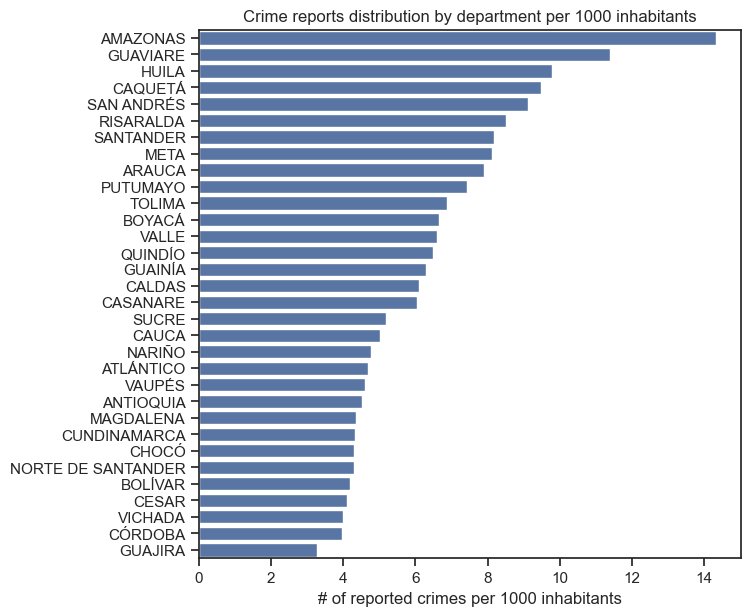

In [21]:
# Crime rate by 1.000 inhabitants

total_crime_per1000= pd.DataFrame(crime_by_department['TOTAL']/(inhabitants_by_department['INHABITANTS'])*1000,columns=['TOTAL']).sort_values('TOTAL',ascending=False)
sns.set_theme(style="ticks")
fig,ax = plt.subplots(figsize=(7,7),dpi=100)
sns.barplot(x="TOTAL",y=total_crime_per1000.index.values,data=total_crime_per1000,color='b')
ax.set_xlabel("# of reported crimes per 1000 inhabitants")
ax.set_title("Crime reports distribution by department per 1000 inhabitants")

### MUNICIPALITY // CITY

**CODIGO DANE**  would be used instead of **MUNICIPIO** as there are places with the same name but with different CODIGO DANE number. This graph again shows similar results as the previous graph where the top cities in population are heading the ranks. I won't make another graph of 'per 1000 inhabitants' as the previous behavior would be found.

Text(0.5, 1.0, 'Top #10 of municipalities with highest crime reports')

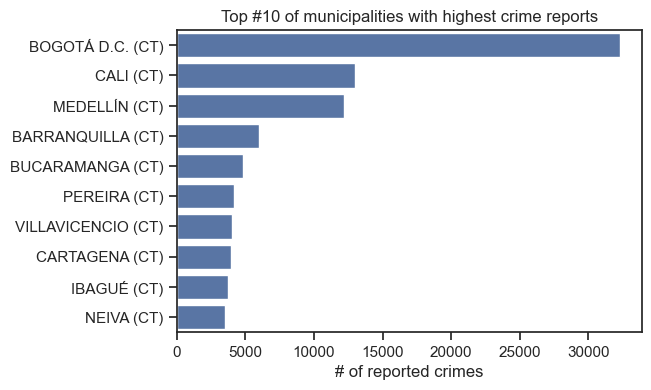

In [27]:
# CODIGO DANE  is used instead of MUNICIPIO as there are places with the same
# name but with different CODIGO DANE number.

crime_by_municipality=crime_data.groupby(['CODIGO DANE','GENERO'])['GENERO'].count().unstack()
crime_by_municipality['TOTAL']=crime_data.groupby(['CODIGO DANE'])['GENERO'].count().values
crime_by_municipality=crime_by_municipality.nlargest(10,'TOTAL').reset_index()


# Making a dict to replace each CODIGO DANE for its equivalent in MUNICIPIO name
aux=crime_data[['CODIGO DANE','MUNICIPIO']]
aux_dict=aux.drop_duplicates().set_index('CODIGO DANE').to_dict()['MUNICIPIO']
crime_by_municipality.replace({'CODIGO DANE':aux_dict},inplace=True)
crime_by_municipality.rename(columns={'CODIGO DANE':'MUNICIPIO'},inplace=True)

#Creating plot
fig,ax=plt.subplots(dpi=100)
sns.set_theme(style="whitegrid")
sns.barplot(x='TOTAL',y='MUNICIPIO',data=crime_by_municipality,color='b',order=crime_by_municipality.sort_values('TOTAL',ascending=False)['MUNICIPIO'])
ax.set_ylabel("")
ax.set_xlabel("# of reported crimes")
ax.set_title("Top #10 of municipalities with highest crime reports")


### WEAPON USAGE

Most crimes were carried out without the use of any weapon; thish may be related to most victims being overpowered by the criminal by strenght. It will be reviewed later by making a graph relating the use of weapons according to the age group of the victim and gender. 

Text(0.5, 1.0, 'Weapon usage in crimes')

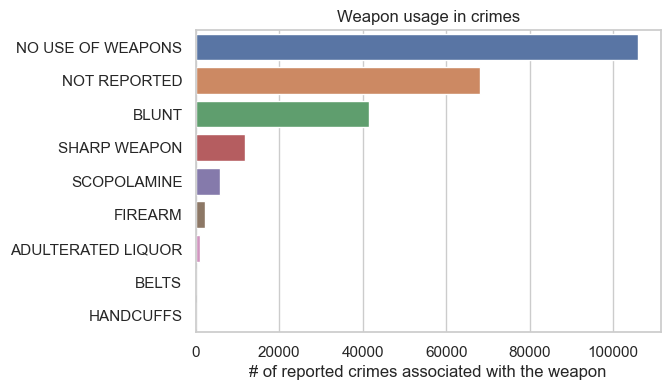

In [34]:
# ARMA
# Making a plot of the most used weapons

weapons_total=crime_data.groupby('ARMA')['ARMA'].count()
weapons_total.sort_values(inplace=True,ascending=False)
weapons_total.rename(index=dict,inplace=True)
fig, ax=plt.subplots(dpi=100)
sns.set_theme(style="whitegrid")
sns.barplot(x=weapons_total,y=weapons_total.index.astype(str))
ax.set_ylabel('')
ax.set_xlabel('# of reported crimes associated with the weapon')
ax.set_title('Weapon usage in crimes')


The next graph shows that minors are the most affected when not using a weapon, followed by adults which probably are female.

Text(0.5, 1.0, 'Crime reports by age group where no weapon was used')

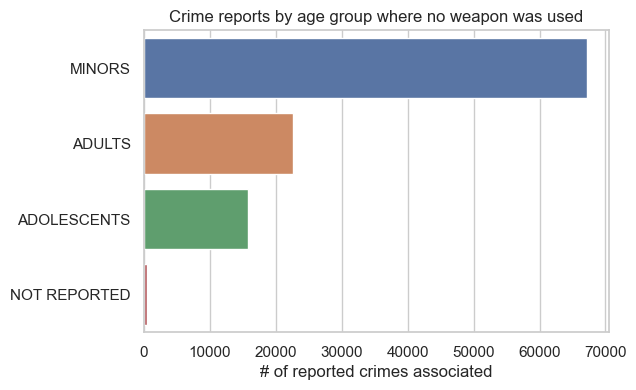

In [41]:
#%% Making plot to check if the no use of weapon is related to the age group of the victim

weapon_by_age_group=crime_data.groupby(['GRUPO ETARIO','ARMA'])['ARMA'].count().rename('VALUE').reset_index()
weapon_by_age_group=weapon_by_age_group.query('`ARMA`=="NO USE OF WEAPONS"')

fig, ax=plt.subplots(dpi=100)
sns.set_theme(style="whitegrid")
sns.barplot(data=weapon_by_age_group,
            x=weapon_by_age_group.VALUE,y=weapon_by_age_group["GRUPO ETARIO"],ci=None,
            order=weapon_by_age_group.sort_values('VALUE',ascending=False)['GRUPO ETARIO'])
ax.set_ylabel('')
ax.set_xlabel('# of reported crimes associated')
ax.set_title('Crime reports by age group where no weapon was used')

Next I plot the percentage of usage for each weapon category  for age group and for adults . Adults would be broken down to men and women.

The plots show that women are the main victims when a firearm, aulterated liquor and scopolamine are used. Against minors, belts, handcuffs and 'no use of weapons' are the most reported. For adolescents and men there is no predominant weapon that could be related in the same way to them.

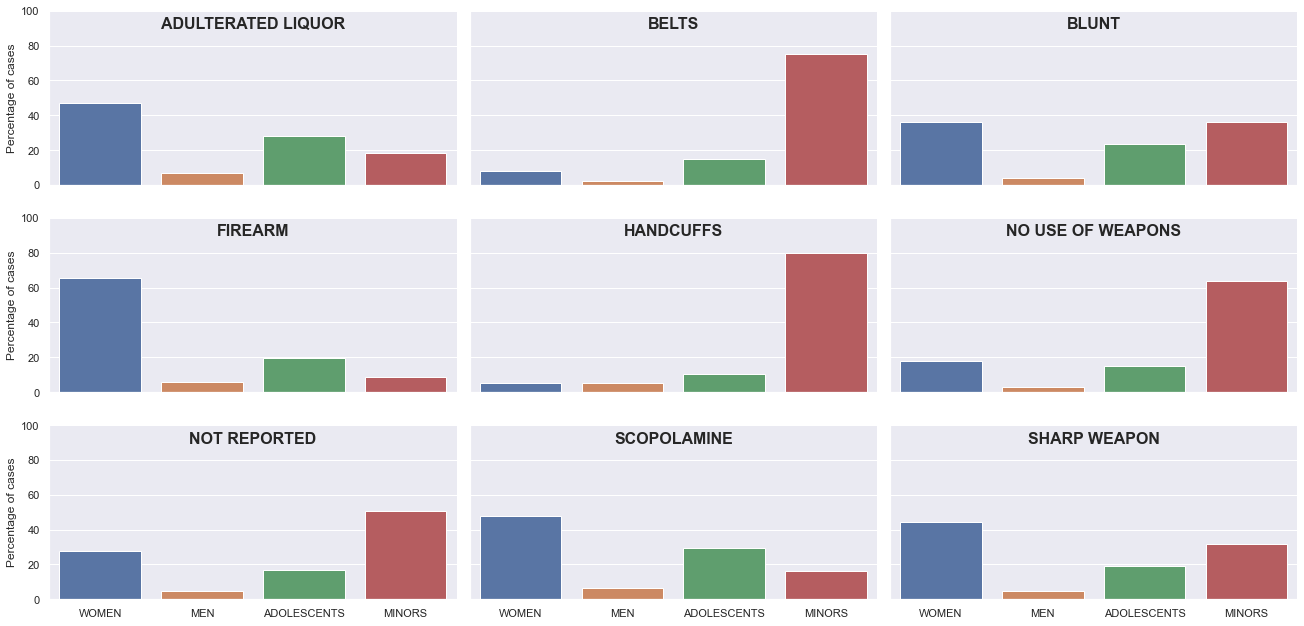

In [48]:
#First I will gather de data to obtain the men and women percentage in adults
weapon_by_gender_adults=crime_data.groupby(['ARMA','GENERO','GRUPO ETARIO'])['GENERO'].count().unstack().reset_index()
weapon_by_gender_adults.drop(columns='NOT REPORTED',inplace=True)
#Dropping NOT REPORTED rows
index_names=weapon_by_gender_adults[weapon_by_gender_adults['GENERO'] == 'NOT REPORTED'].index
weapon_by_gender_adults.drop(index_names,inplace=True)
#Subsetting and then pivoting
weapon_by_gender_adults=weapon_by_gender_adults[['ARMA','GENERO','ADULTS']]
weapon_by_gender_adults=weapon_by_gender_adults.pivot(columns=('GENERO'),values='ADULTS',index='ARMA').reset_index()
weapon_by_gender_adults.rename(columns={'ARMA':'WEAPON','FEMALE':'WOMEN','MALE':'MEN'},inplace=True)


#For last the same data but for minors and adolescents 

weapon_by_age_group=crime_data.groupby(['ARMA','GRUPO ETARIO'])['GRUPO ETARIO'].count().unstack().reset_index()
weapon_by_age_group.drop(columns=['NOT REPORTED','ADULTS'],inplace=True)
weapon_by_age_group.rename(columns={'ARMA':'WEAPON'},inplace=True)
weapon_by_age_group_adults=pd.merge(weapon_by_gender_adults,weapon_by_age_group,how='inner',on='WEAPON')
weapon_by_age_group_adults['TOTAL']=weapon_by_age_group_adults.iloc[:,1:].sum(axis=1)

#Loop to calculate the value/TOTAL column wise and obtain the percentage
for i in range(1,5):
    weapon_by_age_group_adults.iloc[:,i]=weapon_by_age_group_adults.iloc[:,i]/weapon_by_age_group_adults['TOTAL']*100
weapon_by_age_group_adults.drop(columns='TOTAL',inplace=True)
#Melting data for plotting
weapon_by_age_group_adults=weapon_by_age_group_adults.melt(id_vars='WEAPON')
weapon_by_age_group_adults

#Plotting
g=sns.set_theme(style="darkgrid")
g=sns.catplot(data=weapon_by_age_group_adults, x="variable", y="value",col="WEAPON"
              , col_wrap=3,kind="bar", ci=None, height=3,aspect=2)
(g.set_axis_labels("", "Percentage of cases")
.set_titles("{col_name}",y=1,pad=-18, fontweight="bold",size=16)
.set(ylim=(0, 100)))

### DATE

This plot shows the trend of crime reports throughout the year for each year starting at 2010 and up to 2020. There is a trend of crime reports increasing for each year but this could be related to the increase in population. Looking at the trend by month, crime reports decrease in the arriving of Nov and Dec but increase again at the start of the year.

For the year 2020 there was sudden decrease of crime reports around March which is the month when the country made the pandemic of COVID19 official.

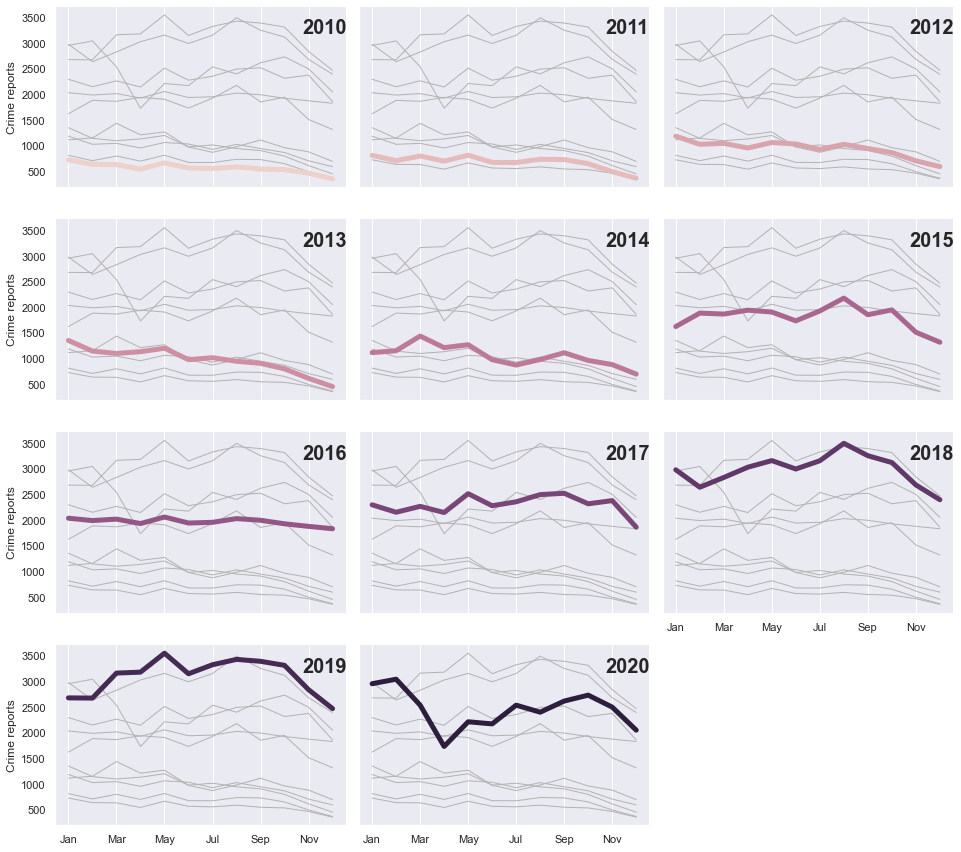

In [75]:
# Making a distribution plot where crimes rate are displayed by month,

crime_by_year=crime_data.groupby([crime_data['FECHA'].dt.year,
                                  crime_data['FECHA'].dt.month]).size()
crime_by_year.rename('VALUE',inplace= True)
crime_by_year.index.names=['YEAR', 'MONTH']
crime_by_year=crime_by_year.reset_index()

# Calculating the average amount of crime reports per month
crime_by_month=crime_by_year.groupby('MONTH')['VALUE'].mean().reset_index()


# Replacing month number for month's name in short format 
dict={1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun'
      ,7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
crime_by_year.replace({'MONTH':dict},inplace=True)

sns.set_theme(style="darkgrid")
g=sns.relplot(data=crime_by_year[crime_by_year['YEAR']<2021],
              x='MONTH',y='VALUE',col='YEAR',col_wrap=3,
              hue='YEAR',kind='line',
              linewidth=5,height=3,aspect=1.5,legend=False,zorder=5)

for year, ax in g.axes_dict.items():
    #Change titles
    ax.text(0.85,0.85,year, transform=ax.transAxes, fontweight="bold",size=20)
    #Add preexisting
    sns.lineplot(data=crime_by_year[crime_by_year['YEAR']<2021], x="MONTH", y="VALUE", units="YEAR",
    estimator=None, color=".7", linewidth=1, ax=ax)
    ax.grid(axis='y')

ax.set_xticks(ax.get_xticks()[::2])
g.set_titles('')
g.set_axis_labels("", "Crime reports")
g.tight_layout()

Here I calculate the average amount of crime reports per month which also confirms the declining of cases when reaching the end of the year.

(0.0, 2500.0)

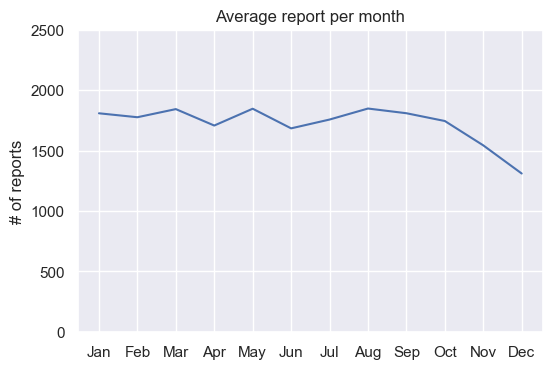

In [82]:
# Calculating the average amount of crime reports per month
crime_by_month.replace({'MONTH':dict},inplace=True)
fig, ax=plt.subplots(dpi=100)
sns.lineplot(data=crime_by_month,y='VALUE',x='MONTH')
ax.set_title('Average report per month')
ax.set_ylabel('# of reports')
ax.set_xlabel('')
ax.set_ylim(ymin=0,ymax=2500)


To see better trend of the crimes rates I calculate the percentage increase by each month, to it I'm going to fit a linear trend line. 

Results show that overtime the crime rate has been maintained as the population grows and is actually slowly decreasing.

In this same graph the peaks show the sudden increase in crime rate at the start of each year.

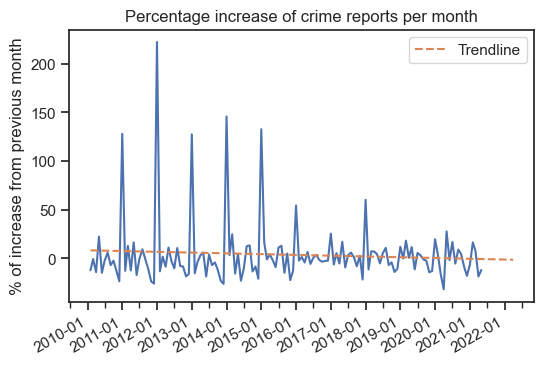

In [113]:
# Now create a new column for storing the percentage change from previous month for a new plot

crime_by_year['PERCENTAGE_CHANGE']=crime_by_year['VALUE'].pct_change()*100

Percentage_change_by_month=pd.DataFrame(
    {'DATE':pd.to_datetime(crime_by_year['YEAR'].astype(str)+'-'+crime_by_year['MONTH'].astype(str)+'-1'),
    'PERCENTAGE_CHANGE':crime_by_year['PERCENTAGE_CHANGE']}
)

#Plotting first the increasing percentage line
fig, ax=plt.subplots(dpi=100)
ax.plot(Percentage_change_by_month['DATE'],Percentage_change_by_month['PERCENTAGE_CHANGE'])
ax.set_title('Percentage increase of crime reports per month')
ax.set_ylabel('% of increase from previous month')
ax.set_xlabel('')
ax.xaxis.set_minor_locator(mdates.MonthLocator(bymonth=7))
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
ax.figure.autofmt_xdate()

# Fiting a linear regresion model to draw a trend line 

coefs= np.polyfit(Percentage_change_by_month['PERCENTAGE_CHANGE'].dropna().index.values,Percentage_change_by_month['PERCENTAGE_CHANGE'].dropna(), 1)
func_trend=np.poly1d(coefs) #Function to use coefs with any input
date_pos=Percentage_change_by_month['DATE'].iloc[[1,-1]] # First and last date value in the dataset

extra_months=12 # Extra months for projection 
for i in range(1,extra_months): 
    aux=[Percentage_change_by_month['DATE'].iloc[-1]+pd.DateOffset(months=i)] # Adds offset of one month to the last value
    date_pos=date_pos.append(pd.Series(aux,index=[date_pos.index.values.max()+1])) # Append new month to series while maintaining index needed for plotting

#Plotting first the increasing percentage line
ax.plot(date_pos,func_trend(date_pos.index.values),linestyle = 'dashed',label='Trendline')
ax.legend()


### GENDER 

As it's been seen before, females are the most affected by sexual crimes. 

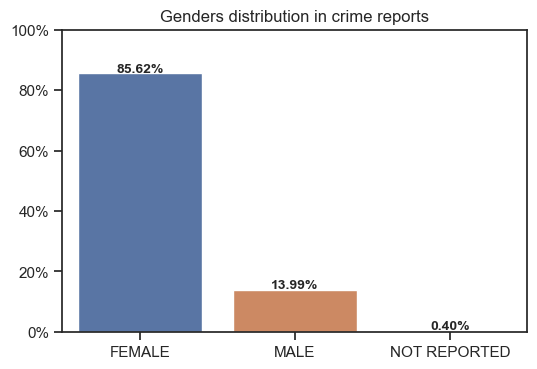

In [121]:
# Plotting to check which gender is the most affected 
crime_by_gender=crime_data.groupby('GENERO').size().reset_index(name='VALUE')
# Percentage of total reported crimes by gender
crime_by_gender['VALUE']=crime_by_gender['VALUE']/crime_by_gender['VALUE'].sum()*100 
crime_by_gender.replace({'GENERO':{'NO REPORTA':'NOT REPORTED','MASCULINO':'MALE','FEMENINO':'FEMALE'}},inplace=True)

fig, ax=plt.subplots(dpi=100)
sns.set_theme(style="whitegrid")
sns.barplot(data=crime_by_gender,x='GENERO',y='VALUE')

for bar in ax.patches:
   
    ax.annotate(format(bar.get_height(), '.2f')+"%",
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 3),
                   textcoords='offset points',fontweight="bold")

ax.set_ylim(top=100)
ax.yaxis.set_major_formatter(PercentFormatter(100))
ax.set_title('Genders distribution in crime reports')
ax.set_xlabel("")
ax.set_ylabel("")
plt.show()




### AGE GROUP

Minors are the most attacked age group followed by adults. In previous information it was shown that adults are mainly women.

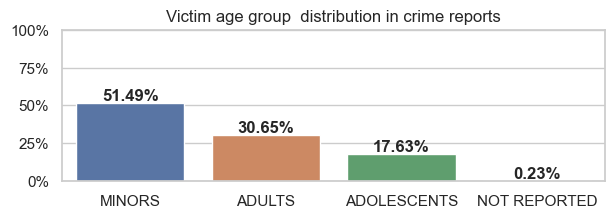

In [129]:
# Plot distribution by each age group and see which one is the most affected

crime_by_age_group=crime_data.groupby('GRUPO ETARIO').size().reset_index(name='VALUE')

crime_by_age_group['VALUE']=crime_by_age_group['VALUE']/crime_by_age_group['VALUE'].sum()*100 
crime_by_age_group.replace({'ADOLESCENTES':'ADOLESCENTS','ADULTOS':'ADULTS','MENORES':'MINORS','NO REPORTA':'NOT REPORTED'},inplace=True)

fig, ax=plt.subplots(dpi=100,figsize=(7,2))
sns.set_theme(style="whitegrid")
sns.barplot(data=crime_by_age_group,
            x='GRUPO ETARIO',y='VALUE',
            order=crime_by_age_group.sort_values('VALUE',ascending=False)['GRUPO ETARIO'])

sns.set_theme(style="whitegrid")
for bar in ax.patches:
   
    ax.annotate(format(bar.get_height(), '.2f')+"%",
                    (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                    size=12, xytext=(0, 5),
                    textcoords='offset points',fontweight="bold")

ax.set_ylim(top=100)
ax.yaxis.set_major_formatter(PercentFormatter(100))
ax.set_title('Victim age group  distribution in crime reports')
ax.set_xlabel("")
ax.set_ylabel("")
ax.tick_params(axis='x')
plt.show()



### AMOUNT OF CRIMINALS INVOLVED


This one doesn't require a plot but can be pointed out that almost 100% of the crime reports were done by a single criminal.

In [148]:
#%% CANTIDAD

crime_by_criminal_amount=crime_data.groupby('CANTIDAD').size().reset_index(name='VALUE')
crime_by_criminal_amount['VALUE']=crime_by_criminal_amount['VALUE']/crime_by_criminal_amount['VALUE'].sum()*100
crime_by_criminal_amount['VALUE']=crime_by_criminal_amount['VALUE'].apply(lambda x: ('%1.1f'%x +'%'))
print(crime_by_criminal_amount.head(5))

  CANTIDAD  VALUE
0        1  98.3%
1        2   1.5%
2        3   0.2%
3        4   0.1%
4        5   0.0%


### LAW INFRIDGMENT


For last a plot to see which law's article was the most broken.

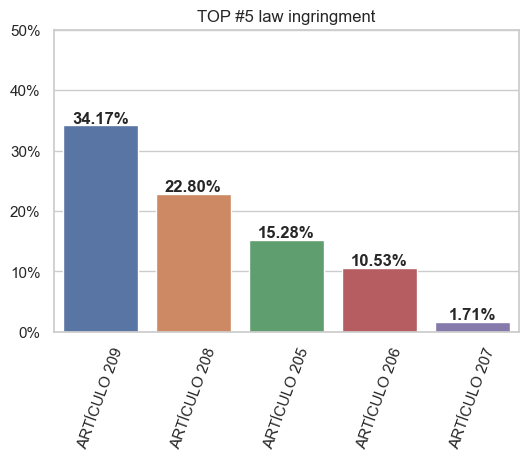

In [158]:
# Plot to see the most common law infridgment by general and by department.


crime_by_infringement=crime_data.groupby('DELITO').size().reset_index(name='VALUE')
crime_by_infringement['VALUE']=crime_by_infringement['VALUE']/crime_by_infringement['VALUE'].sum()*100 
crime_by_infringement['DELITO']=crime_by_infringement['DELITO'].str.partition(sep='.')[0] # Trimming the law description down to only the article number.

fig, ax=plt.subplots(dpi=100)
sns.set_theme(style="whitegrid")
sns.barplot(data=crime_by_infringement.iloc[0:5],
            x='DELITO',y='VALUE',
            order=crime_by_infringement.iloc[0:5].sort_values('VALUE',ascending=False)['DELITO'])
for bar in ax.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    ax.annotate(format(bar.get_height(), '.2f')+"%",
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 5),
                   textcoords='offset points',fontweight="bold")

ax.tick_params(axis='x', rotation=70)
ax.set_ylim(top=50)
ax.yaxis.set_major_formatter(PercentFormatter(100))
ax.set_title('TOP #5 law ingringment')
ax.set_xlabel("")
ax.set_ylabel("")
plt.show()
